# Homework 3 - Leading local Lyapunov Vectors

## Ronan McCormack
## 17328461
## ACM40080

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

---

## (a)

Write and fully document a jupyter notebook python code which will calculate the LLV for the Lorenz system for a given initial condition.

You can choose any initial condition when writing your code, but I will test all code with the same (unknown) initial condition, so please have a clearly indicated cell in your code where I can set the initial condition.

## (b)
Use 7 points. one control, and one along each +/- x/y/z axis.

Perturbation magnitude = 0.1

## (c) 
Compare LLV growth with an ensemble which perturbs all axes equally.

---

In [2]:
# lorenz code:

def my_lorenz(x, y, z):
    sigma = 10.
    b = 8./3
    r = 28
    dt = 0.005
    dx = sigma*(y-x)
    dy = (r*x) - y - (x*z)
    dz = (x*y) - (b*z)
    x = x + dt*dx
    y = y + dt*dy
    z = z + dt*dz
    return([x, y, z])  # changed to output array

We'll start off by defining two integrating Lorenz functions, one that will output an array of points generated at each iteration, and another that will output the endpoints only.

In [3]:
# make a function to integrate Lorenz system with initial condition 'X0' over 'timesteps' timesteps, 
# and output array of points generated at *each* iteration... useful for plotting paths

def integrate_lorenz(X0, timesteps):
    X = np.zeros((timesteps+1,len(X0)))
    X[0] = X0
    for i in range(timesteps):        
        X[i+1] = my_lorenz(X[i][0], X[i][1], X[i][2])
    
    return(X)

In [4]:
# Define another Lorenz integrating function that outputs the endpoints only

def integrate_lorenz_2(X0, timesteps):
    X1 = X0
    for i in range(timesteps):        
        X2 = my_lorenz(X1[0], X1[1], X1[2])
        X1 = X2
    return(X1)

## Define Hypersphere Points

The first step in working towards the LLV is initialising the model. We'll do so by generating six initial perturbations on a "hypersphere" of radius dp around the control point X0. The following function, *hypersphere(X0,dp)*, is defined to carry out this task.

In [5]:
# Define function to generate points on hypersphere
# Given initial condition (control X0, of dimension n), generate 2n points on surrounding hypersphere with radius dp

def hypersphere(X0,dp):
    # generate 2n points surrounding   and store in 2nx3 array
    n = len(X0)
    X_store = np.zeros((2*n, len(X0)))
    
    # first, populate X_store with points where dp is *added* to each index of x0
    # then, fill the rest of X_store with points where dp is *subtracted* from each index of x0
    ones = np.identity(n)
    for i in range(n):
        X_store[i] = X0 + dp*ones[i]   # loop through rows of identity matrix to modify different index
        X_store[-(i+1)] = X0 - dp*ones[-(i+1)]

    return X_store

This hypersphere function outputs an array storing the hypersphere points surounding X0.

We thus have a way of generating a hypershphere of initial perturbations. 

To get a feel for things, we'll plot the trajectories of the hypersphere points and the control point *X0* over, say, 250 timesteps. We'll generate a background of the Lorenz attractor first by integrating over many timesteps starting at *X0*. 

For these plots we'll consider the xz projection of the 3D system.

---

**Enter intial control point here:**

In [6]:
X0 = np.array([1,2,20])

---

In [40]:
# generate Lorenz attractor over many timesteps for background plot

iters_1 = 10000

X = integrate_lorenz(X0, iters_1+2000)
xs, ys, zs = np.transpose(X[2000:]) # splitting X into x, y, z values; take first 2000 points to be "burn in"


Now, we'll generate the trajectories for each of the 6 hypersphere points, as well as the control.

Here are the initial hypersphere points:

In [41]:
dp = 0.1
hypersphere(X0, dp)

array([[ 1.1,  2. , 20. ],
       [ 1. ,  2.1, 20. ],
       [ 1. ,  2. , 20.1],
       [ 0.9,  2. , 20. ],
       [ 1. ,  1.9, 20. ],
       [ 1. ,  2. , 19.9]])

In [42]:
# integrate lorenz for 6 points. Outputs will be (iters_2+1)x3 arrays

dp = 0.1
iters_2 = 250
big_store = np.zeros((2*len(X0), iters_2+1, len(X0)))

# control
Xc = np.transpose(integrate_lorenz(X0, iters_2))

# hypersphere
index = 0
for x in hypersphere(X0, dp):
    big_store[index] = integrate_lorenz(x, iters_2)
    index+=1

*big_store* now contains the integrations of the lorenz system for each starting point in the hypersphere.
We'll plot the xz projection of each of these paths along with the control path. Beneath it we'll show a magnified view of the initial perturbations.

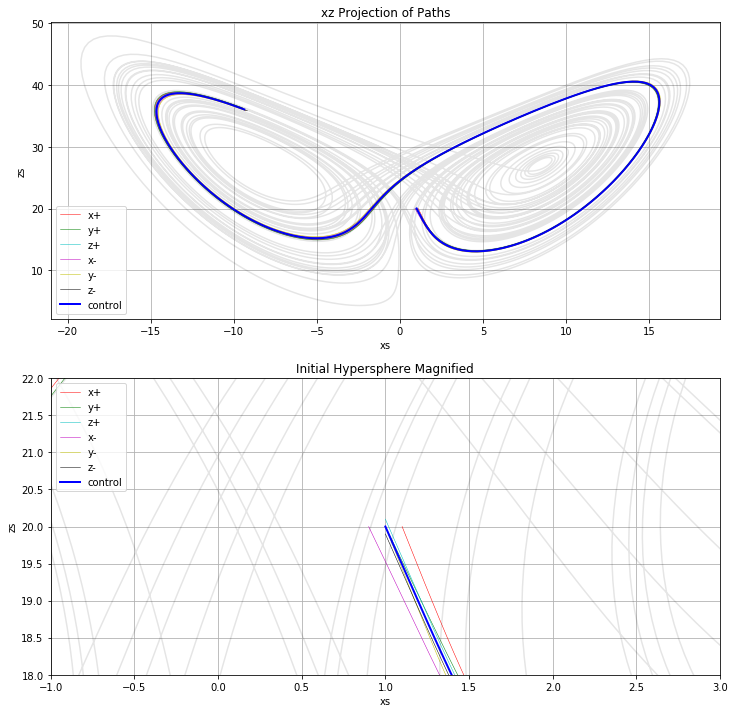

In [43]:
# plot 6 trajectories in big_store, along with control trajectory

fig4, ax4 = plt.subplots(2, 1, figsize=(12,12))
#ax = plt.axes([0,0,1,1])

xx = np.zeros((big_store.shape[0],big_store.shape[1]))  # x values for all systems
zz = np.zeros((big_store.shape[0],big_store.shape[1]))  # y values for all systems

labels = ['x+','y+','z+','x-','y-','z-']
cols = ['r','g','c','m','y','k']

for i in range(big_store.shape[0]):
    xx[i] = np.transpose(big_store[i,:,0])
    zz[i] = np.transpose(big_store[i,:,2])
    ax4[0].plot(xx[i], zz[i], cols[i], linewidth=0.5, label=labels[i])
    ax4[1].plot(xx[i], zz[i], cols[i], linewidth=0.5, label=labels[i])
    

ax4[0].plot(Xc[0], Xc[2], 'b', linewidth=2, label='control')
ax4[1].plot(Xc[0], Xc[2], 'b', linewidth=2, label='control')
    
ax4[0].plot(xs, zs, 'k-', alpha=0.1)   
ax4[0].set_ylabel('zs')
ax4[0].set_xlabel('xs')
ax4[0].set_title('xz Projection of Paths')
ax4[0].legend()
ax4[0].grid()

ax4[1].plot(xs, zs, 'k-', alpha=0.1)
ax4[1].set_ylabel('zs')
ax4[1].set_xlabel('xs')
ax4[1].set_xlim(X0[0]-20*dp,X0[0]+20*dp)
ax4[1].set_ylim(X0[2]-20*dp,X0[2]+20*dp)
ax4[1].set_title('Initial Hypersphere Magnified')
ax4[1].legend()
ax4[1].grid()


Now we'll extract the final points only, scale this 'hyper-ellipsoid' down, and run the Lorenz system again.
This process will later be repeated to obtain the LLV.

### Endpoints

Here we define a function that will act on the hypersphere or hyperellipsoid of initial perturbations and output the endpoints of their paths through the Lorenz system. Care is taken to enable the function to act on a single vector, or an array of vectors.

In [11]:
# Define function that takes in array of starting points 
# and outputs endpoints after being integrated over so many timesteps 'iters'

def endpoints(X, timesteps):
    X = np.array(X)
    if np.array(X.shape).size == 1: # accounting for a vector input
        m=1
        n=X.size
        
        endpoints = np.zeros((m, n))
        endpoints = integrate_lorenz_2(X, timesteps)
        
    else:                         # for matrix input
        m, n = X.shape
        
        endpoints = np.zeros((m, n)) # output will be one endpoint for each start point
        
        for i in range(m):
            endpoints[i] = integrate_lorenz_2(X[i], timesteps)
            
    return endpoints
    

### Hyperellipsoid

Now, we will define a function that will transform the endpoints into a hyperellipsoid of perturbations around the control point, *X0*.  

We'll start off by subtracting the endpoint of *X0*, *Xf_control*, from each of the endpoints. These will be stored in *perts_recentred*. Then take the maximum of the recentred points norms, *maxnorm*. Divide all the recentred perturbations by *maxnorm*, and multiply by *dp*. Then we'll have the hyperellipsoid perturbations, which will be added to X0 to yield the hyperellipsoid perturbations around *X0* in *X_new*.

In [12]:
# define function that takes in endpoints array, translates and normalises these endpoints, 
# and outputs points on hyperellipsoid around X0

def hyperellipsoid(Xf, X0, timesteps):
    dp = 0.1
    
    Xf_control = endpoints(np.array(X0), timesteps)
    Xf_pert = Xf
    
    perts_recentred = Xf_control*np.ones((len(Xf_pert),1)) - Xf_pert
    
    maxnorm = max([la.norm(vec) for vec in np.array([perts_recentred[i] for i in range(perts_recentred.shape[0])])])
        
    perts_normalised = dp*perts_recentred/maxnorm   # 'dp*' beacuse we want the maximum norm to be dp, not 1.0
    
    # generate hyperellipsoid surrounding X0 by adding the vectors of normalised, centred endpoints
    X_new = np.array([x + X0 for x in perts_normalised])
    
    return X_new, perts_normalised

We're now ready to iterate.

### Obtaining the LLV

There remains the question of finding the actual Leading Lyapunov Vector. 

My approach to obtaining the LLV is as follows:

- Iterate hyperellipsoid(endpoints) in a while loop
- This will continually produce an array of six vectors, updating the initial pertubations around the control point
- At each iteration, subtract the control endpoint from the six initial perturbation endpoints
- Compute the lengths of these vectors and pick out the maximum norm
- Rescale by dividing by this max norm, and multiply by dp so that the longest vector now has length dp
- Pick out this "longest vector" and append to the array *llv_store*. These vectors will converge to the LLV
- Continue iterating until the distance between consecutive vectors in *llv_store* is less than some small number *eps*

Actually, what sometimes happens is that the vector with maximum norm picked out alternates in opposite directions with every iteration, but nevertheless converges to two opposite vectors simulataneously. To accommmodate for this, we'll measure the distance between every second vector in *llv_store*, rather than consecutive, and break our loop when this distance is sufficiently small.

The following function *LLV* does all this, outputting the LLV, the array storing the vectors picked out at each iteration (*llv_store*), and the number of iterations undergone (*nloop*).

In [13]:
# define a function to output the LLV, given initial points X (e.g. hypersphere around X0), with maximum of 'maxits' loops

def LLV(X0, X, timesteps, eps):
    
    Xf = endpoints(X0, timesteps)
    
    # initialise variables and arrays
    he1 = X
    he2 = hyperellipsoid(endpoints(he1, timesteps), X0, timesteps)[0]
    perturbations = hyperellipsoid(endpoints(he1, timesteps), X0, timesteps)[1]
    
    # We'll be extracting the LLV after each loop later on. Initiaise an array here to store these
    llv_index = np.argmax([la.norm(x) for x in perturbations])  # outputs the index of the vector with the largest norm in perturbations
    llv_store = np.array([perturbations[llv_index]])
    errors = np.array([1.0])  # not necessary.. included for troubleshooting
    
    
    llv_change = eps+1 # initialise such that it's greater than eps
            
    # start looping
    nloop = 0   
    
    # iterate until the dstance between consecutive LLVs is less than eps, or the maximum number of iterations has been reached    
    while llv_change >= eps: 
        nloop+=1
        tmp1 = endpoints(he2,timesteps)
        tmp2 = hyperellipsoid(tmp1, X0, timesteps)
        he1 = he2
        he2 = tmp2[0]
        perturbations = tmp2[1]
        
        llv_index = np.argmax([la.norm(x) for x in perturbations])
        llv_store = np.append(llv_store, [perturbations[llv_index]], axis=0)
        
        # In case LLV is alternating directions (+ and -), 
        # measure the distance between every second LLV, rather than consecutive. (once we've two steps done)
        if nloop >= 2:
            llv_change = la.norm(llv_store[nloop] - llv_store[nloop-2])
        
        else:
            llv_change = la.norm(llv_store[nloop] - llv_store[nloop-1])
        
        errors = np.append(errors, [llv_change], axis=0)
        
        maxits = 5000
        if nloop >= maxits:
            print('Not Convergent')
            break
            
    # extract the final vector from llv_store. This is the LLV
    llv = llv_store[-1]
     
    return llv, llv_store, nloop, perturbations
    
    

The first output of the LLV function is the LLV itself.  
The second output is the array of vectors computed at each iteration.  
The third outpt is the number of iterations completed.  

## Implementing LLV

We'll now try this LLV function on an example.

We'll start off by setting the control point *X0*, its surounding hypersphere *hs*, the number of timesteps we'll use per iteration *timesteps*, and the error tolerance *X0*.

Note: *timesteps* should be set to be relatively low. If we integrate too far ahead we'll lose linearity and the hyperelipsoid will become something of a *hyper-banana*, in which case the method would be flawed. Thus, I've set *timesteps = 5*.

It is also worth noting that convergence isn't always inevitable. Sometimes, depending on the control point, we might not be able to determine the LLV.

In [14]:
# change X0 here if desired:

# X0 = np.array([1,4,10])

In [15]:
hs = hypersphere(X0,dp)
timesteps = 5
eps = 10**(-8)    # Feel free to change this

LLV_outputs = LLV(X0, hs, timesteps, eps)  # contains all outputs of LLV function

We'll plot the final perturbations around the control point. To do this, I'll define a function that will take in the initial hypersphere points, *X1*, and the final hyperellipsoid points, *X2*, and output three 2D projections of these points plotted.

In [16]:
# define a function that will plot each point in two arrays in 3 projections


def plot_fn(X1, X2):
    # X1 and X2 contain points in 3 dimensions
    # For each point in X1 and X2, plot the xy, xz and yz projections
    
    fig1, axs1 = plt.subplots(1, 3, figsize=(15,5))
    for x in X1:plot
        axs1[0].plot(x[0],x[1], 'bo')
        axs1[1].plot(x[0],x[2], 'bo')
        axs1[2].plot(x[1],x[2], 'bo')
    
    if np.array(X2.shape).size == 1:   # in case X2 is just a vector
        axs1[0].plot(X2[0],X2[1], 'ro')
        axs1[0].set_title('xy')
        axs1[1].plot(X2[0],X2[2], 'ro')
        axs1[1].set_title('xz')
        axs1[2].plot(X2[1],X2[2], 'ro')
        axs1[2].set_title('yz')
    
    else:
        for x in X2:
            axs1[0].plot(x[0],x[1], 'ro')
            axs1[0].set_title('xy')
            axs1[1].plot(x[0],x[2], 'ro')
            axs1[1].set_title('xz')
            axs1[2].plot(x[1],x[2], 'ro')
            axs1[2].set_title('yz')

    return

Now to plot these points.

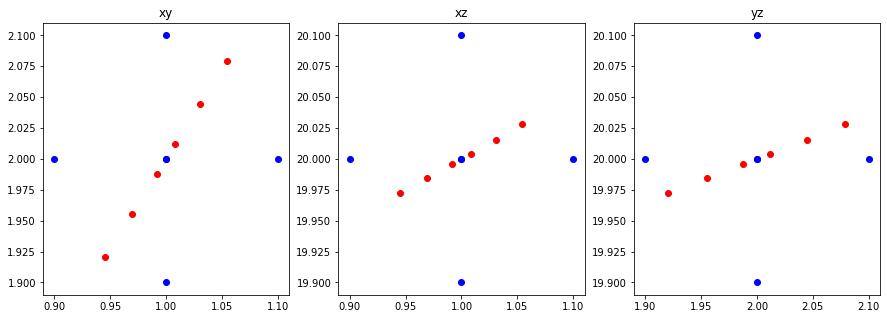

In [17]:
he_final = LLV_outputs[3] + X0
plot_fn(hs, he_final)

Text(0.5, 0.92, 'Converged Hyperellipsoid Points')

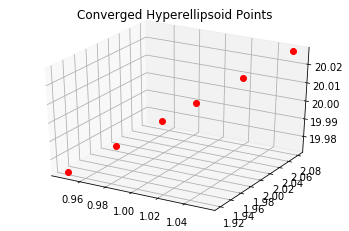

In [18]:
# 3D plot

from mpl_toolkits.mplot3d import Axes3D

x_vals, y_vals, z_vals = np.transpose(he_final)

fig5 = plt.figure()
ax5 = fig5.add_subplot(projection='3d')
ax5.plot(x_vals, y_vals, z_vals, 'ro')
ax5.set_title('Converged Hyperellipsoid Points')



In [19]:
he_final[:,0]

array([0.96933374, 0.94550446, 1.00834152, 1.03066558, 1.05449429,
       0.99165854])

As expected, the hyperellipsoid has converged to a straight line in three dimensions.

**And so, here is the LLV, normalised to length 0.1:**

In [20]:
print('LLV:', LLV_outputs[0])

LLV: [-0.05449554 -0.07903893 -0.02798363]


In [21]:
print('Number of iterations undergone:', LLV_outputs[2])

Number of iterations undergone: 82


We have the vectors converging to the LLV stored in the second output of the LLV funtion

Using these, we'll plot the convergence of each coordinate in the LLV against number of iterations.

Text(0.5, 1.0, 'Convergence of LLV')

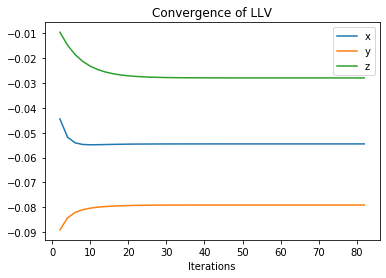

In [22]:
llv_store1 = LLV_outputs[1]
llv_store = llv_store1[0::2]   # pick out every second one in case of alternating direction issue

nloops = len(llv_store)-1

x = np.linspace(1, nloops, nloops)*2  # generate array for number of iterations

plt.plot(x, llv_store[1:,0], x, llv_store[1:,1],x , llv_store[1:,2])
plt.legend({"x","y","z"})
plt.xlabel('Iterations')
plt.title("Convergence of LLV")

---

## Compare LLV growth hypersphere growth

Approach:

First - Compute distances from control endpoint to endpoints of each point from hypersphere.

Second - Set initial point along LLV from control and compute the distance from its endpoint to the control endpoint.

Compare.

Plot a bar chart of the distances, and plot the xz projection of the trajectories on the Lorenz attractor.

We'll define a function that will output the distances from endpoints of the initial points in the array *X* to the endpoint of a control point, *X0*. 

In [23]:
# Define function that will output the distances from endpoints of initial points in array, X, 
# to the endpoint of a control point, X0. 

# Integration over 'timesteps' timesteps

def distances(X0, X, timesteps):
    X0_end = np.array(endpoints(X0, timesteps))
    X_end = np.array(endpoints(X, timesteps))
    
    distances = np.zeros(len(X))
    
    if np.array(X_end.shape).size == 1:   # in case X2 is just a vector
        distances = la.norm(X_end - X0_end)
    
    else:
        for i in range(len(X_end)):
            distances[i] = la.norm(X_end[i] - X0_end)
        
    return distances


We're still using the same parameters as before. Using the LLV we have as output from the LLV function, we'll define a perturbation from X*0* in the direction of the LLV, and call this perturbation *X0_llv*.

In [24]:
dp_llv = LLV_outputs[0]
X0_llv = X0 + dp_llv

We'll now determine the aforementioned distances and compare in a histogram.

In [25]:
hs_distances = distances(X0, hypersphere(X0,dp), timesteps) # Growth of hypersphere perturbations
llv_distance = distances(X0, X0_llv, timesteps)      # Growth of LLV perturbation


x_bar = np.arange(len(hs_distances))

bars = np.append(hs_distances,llv_distance)
x_bar = np.arange(len(bars))

labels1 = ['x+','y+','z+','x-','y-','z-', 'LLV']

Text(0, 0.5, 'distance from control')

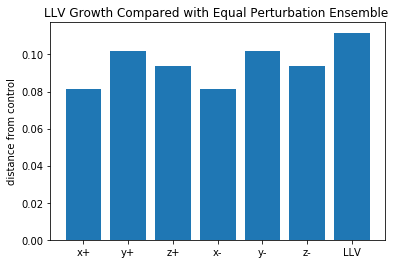

In [26]:
plt.bar(x_bar, bars, tick_label=labels1)
plt.title('LLV Growth Compared with Equal Perturbation Ensemble ')
plt.ylabel('distance from control')

As is expected (for my pre-selected control point (1,2,20) at least), the LLV perturbation grows more than any of the hypersphere perturbations. In fact there should be no direction of perturbation that grows faster than the LLV.

To visualise this a bit more, we'll plot the trajectories in 2D.

In [27]:
# plot the trajectories

big_store_2 = np.zeros((2*len(X0), timesteps+1, len(X0)))

# control trajectory
Xc = np.transpose(integrate_lorenz(X0, timesteps))

# hypersphere trajectories
index = 0
for x in hypersphere(X0, dp):
    big_store_2[index] = integrate_lorenz(x, timesteps)
    index+=1
    
# LLV perturbed trajectory
X_llv = np.transpose(integrate_lorenz(X0_llv, timesteps))

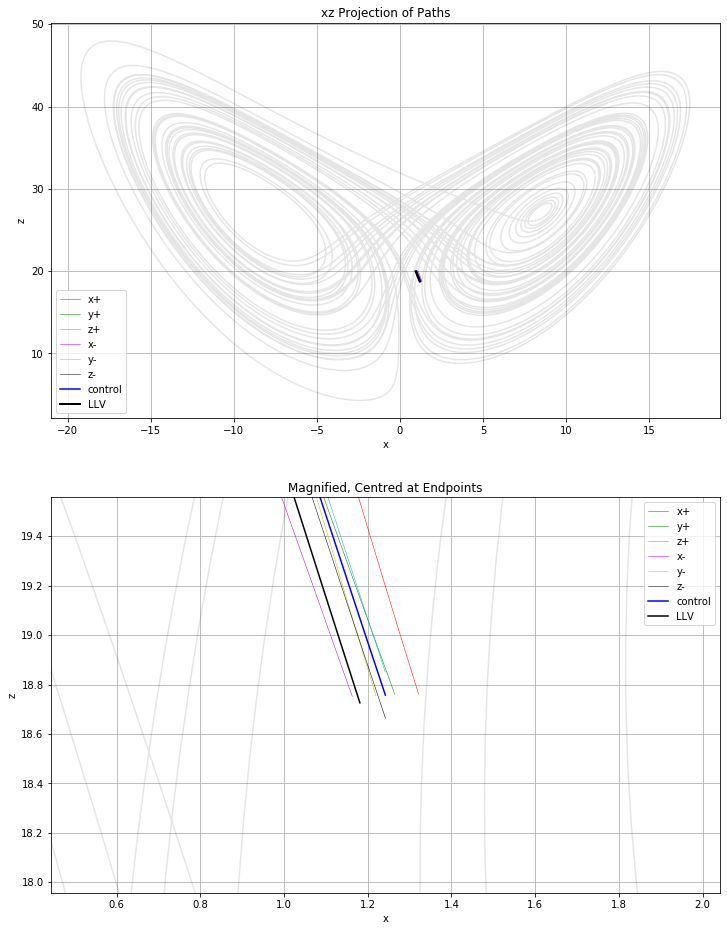

In [28]:
# plot 6 trajectories in big_store_2, along with control trajectory

# plot also the Lyapunov perturbed vector



fig6, ax6 = plt.subplots(2, 1, figsize=(12,16))

xx = np.zeros((big_store_2.shape[0],big_store_2.shape[1]))  # x values for all systems
zz = np.zeros((big_store_2.shape[0],big_store_2.shape[1]))  # y values for all systems

labels = ['x+','y+','z+','x-','y-','z-']
cols = ['r','g','c','m','y','k']

for i in range(big_store_2.shape[0]):
    xx[i] = np.transpose(big_store_2[i,:,0])
    zz[i] = np.transpose(big_store_2[i,:,2])
    ax6[0].plot(xx[i], zz[i], cols[i], linewidth=0.5, label=labels[i])
    ax6[1].plot(xx[i], zz[i], cols[i], linewidth=0.5, label=labels[i])
    
# control trajectory
ax6[0].plot(Xc[0], Xc[2], 'b', linewidth=1.5, label='control')
ax6[1].plot(Xc[0], Xc[2], 'b', linewidth=1.5, label='control')

# LLV perturbed trajectory
ax6[0].plot(X_llv[0], X_llv[2], 'k', linewidth=2, label='LLV')
ax6[1].plot(X_llv[0], X_llv[2], 'k', linewidth=1.5, label='LLV')

ax6[0].plot(xs, zs, 'k-', alpha=0.1)   # xs, zs from before
ax6[0].set_ylabel('z')
ax6[0].set_xlabel('x')
ax6[0].set_title('xz Projection of Paths')
ax6[0].legend()
ax6[0].grid()

ax6[1].plot(xs, zs, 'k-', alpha=0.1)
ax6[1].set_ylabel('z')
ax6[1].set_xlabel('x')
ax6[1].set_xlim(Xc[0][-1]-8*dp,Xc[0][-1]+8*dp)
ax6[1].set_ylim(Xc[2][-1]-8*dp,Xc[2][-1]+8*dp)
ax6[1].set_title('Magnified, Centred at Endpoints')
ax6[1].legend()
ax6[1].grid()



### Repeating with many integration timesteps

Before we finish up, let's just see what happens if we integrate many timesteps into the future at each iteration. Rather than 5, let's set *timesteps = 200*, and repeat the same analysis.

It mightn't turn out that we have convergence. I say "mightn't" because, depending on where we start on the Lorenz attractor, 200 timesteps into the future may still preserve linearity. For an example where we definitely don't have convergence, take *X0 = (-2,3,25)*.

In [29]:
# change X0 here if desired:

X0_2 = np.array([-2,3,25])

In [30]:
hs_2 = hypersphere(X0_2,dp)
timesteps_2 = 200
eps_2 = 10**(-8)    # Feel free to change this

LLV_outputs_2 = LLV(X0_2, hs_2, timesteps_2, eps_2)  # may take longer this time

Not Convergent


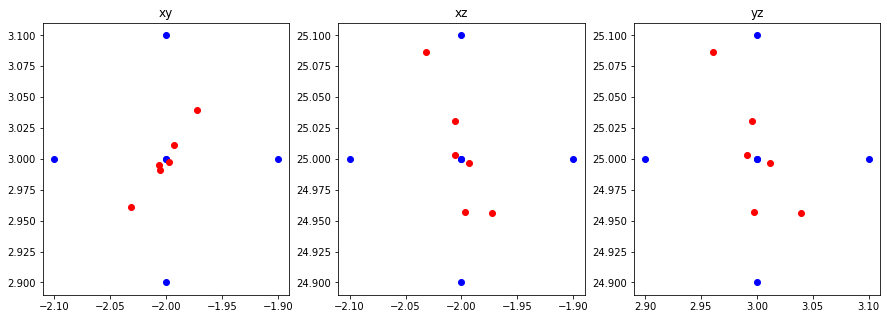

In [31]:
he_final_2 = LLV_outputs_2[3] + X0_2
plot_fn(hs_2, he_final_2)

Text(0.5, 0.92, 'Non-Converged Hyperbanana Points')

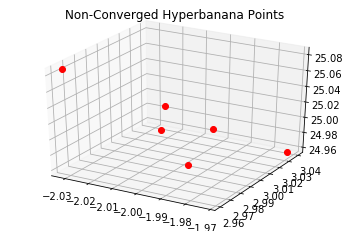

In [32]:
x_vals_2, y_vals_2, z_vals_2 = np.transpose(he_final_2)

fig6 = plt.figure()
ax6 = fig6.add_subplot(projection='3d')
ax6.plot(x_vals_2, y_vals_2, z_vals_2, 'ro')
ax6.set_title('Non-Converged Hyperbanana Points')

In [33]:
print('LLV:', LLV_outputs_2[0])

LLV: [-0.03159578 -0.03927759  0.08636537]


In [34]:
print('Number of iterations undergone:', LLV_outputs_2[2])

Number of iterations undergone: 5000


Presuming we've undergone many more than 50 iterations, we'll make the same convergence plot as earlier, but only show the last 50 iterations.

Text(0.5, 1.0, 'Convergence of LLV')

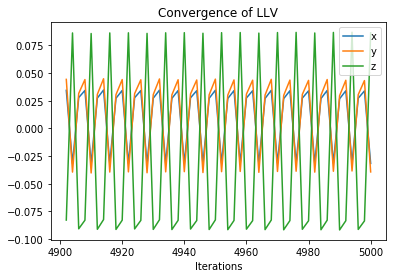

In [35]:
llv_store1_2 = LLV_outputs_2[1]
llv_store_2 = llv_store1_2[0::2]   # pick out every second one in case of alternating direction issue

nloops_2 = len(llv_store_2)-1

x_2 = np.linspace(1, nloops_2, nloops_2)*2  # generate array for number of iterations

plt.plot(x_2[-50:], llv_store_2[-50:,0], x_2[-50:], llv_store_2[-50:,1],x_2[-50:] , llv_store_2[-50:,2])
plt.legend({"x","y","z"})
plt.xlabel('Iterations')
plt.title("Convergence of LLV")

In [36]:
dp_llv_2 = LLV_outputs_2[0]
X0_llv_2 = X0_2 + dp_llv_2

And now to compare the distances:

In [37]:
hs_distances_2 = distances(X0_2, hypersphere(X0_2,dp), timesteps_2) # Growth of hypersphere perturbations
llv_distance_2 = distances(X0_2, X0_llv_2, timesteps_2)      # Growth of LLV perturbation


x_bar_2 = np.arange(len(hs_distances_2))

bars_2 = np.append(hs_distances,llv_distance)
x_bar_2 = np.arange(len(bars_2))

labels1 = ['x+','y+','z+','x-','y-','z-', 'LLV']

Text(0, 0.5, 'distance from control')

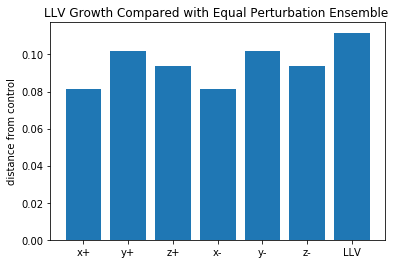

In [38]:
plt.bar(x_bar_2, bars_2, tick_label=labels1)
plt.title('LLV Growth Compared with Equal Perturbation Ensemble ')
plt.ylabel('distance from control')

From the convergence plot we can see that there essentially is no convergence, and we haven't really obtained the LLV. It may well now be the case that the LLV growth is not the highest in the bar chart, though for *X0 = (-2,3,25)* it still is.
 
Integrating so far into the future has resulted in a loss of linearity and our hyperellipsoid is becoming a "hyperbanana". This deformation compromises the method of replacing the initial perturbations with the final perturbations, and so we know we should keep the timesteps low to avoid this.

---